In [182]:
import matplotlib.pyplot as plt

from bubblekicker.bubblekicker import BubbleKicker, batchbubblekicker
from bubblekicker.pipelines import CannyPipeline, AdaptiveThresholdPipeline

In [183]:
%matplotlib inline

In [184]:
#!dir

### Pipelines testing¶

#### Canny canonical method

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


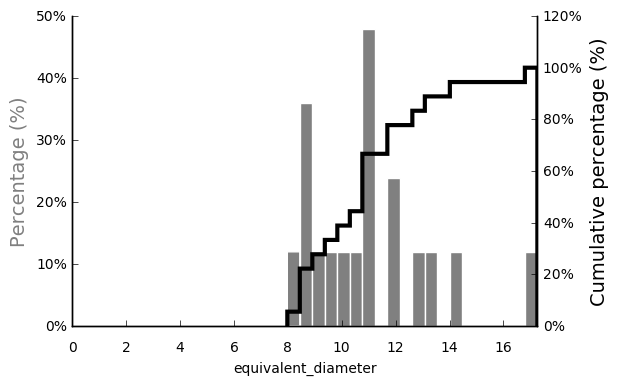

In [185]:
bubbler = CannyPipeline('0325097m_0305.tif', channel='red') #setup the pipeline by loading the file
result = bubbler.run([120, 180], 3, 3, 1, 1)  # executing the pipeline with custom parameters
nbubbles, marker_image, props = bubble_properties_calculate(result)  # extract the properties
filtered_bubbles = bubble_properties_filter(props)   # filter based on the default filter rules
fig, axs = bubble_properties_plot(filtered_bubbles, "equivalent_diameter")  # make a plot
#plt.savefig('BSDhist.png')

Steps undertaken since from raw image:
edge-detect with thresholds 120 -> 180 - opencv
dilate with footprintsize 3 - opencv
fill holes - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




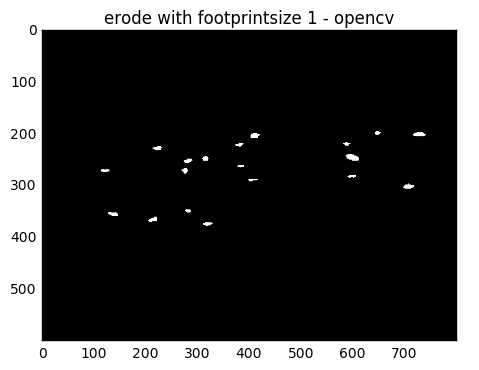

In [153]:
bubbler.plot();
bubbler.what_have_i_done()

#### Adaptive threshold method

{'min': 0.92}
{'max': 1.6, 'min': 0.2}


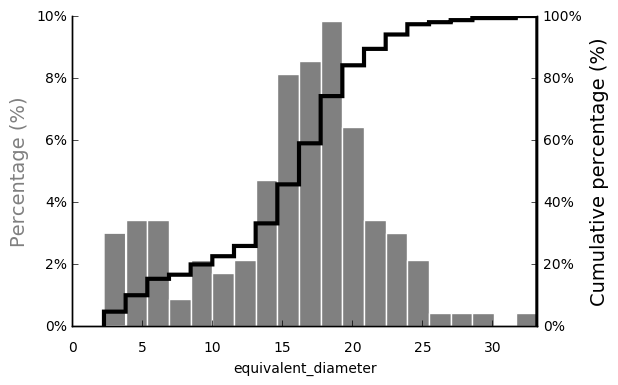

In [154]:
bubbler = AdaptiveThresholdPipeline('0325097m_0305.tif', channel='red') #setup the pipeline by loading the file
result = bubbler.run(91, 18, 3, 1, 1)  # executing the pipeline with custom parameters
nbubbles, marker_image, props = bubble_properties_calculate(result)  # extract the properties
filtered_bubbles = bubble_properties_filter(props)   # filter based on the default filter rules
fig, axs = bubble_properties_plot(filtered_bubbles, "equivalent_diameter")  # make a plot

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 91 and cvalue 18 - opencv
clear border with buffer size 3 and bgval 1 -  skimage
erode with footprintsize 1 - opencv




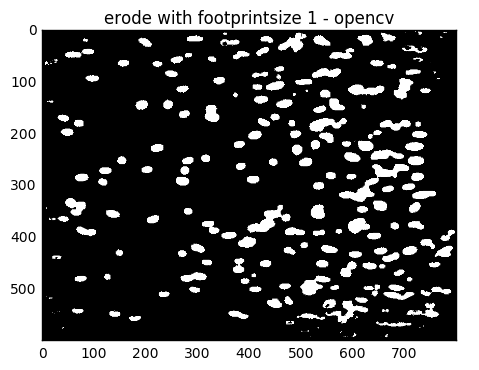

In [156]:
bubbler.plot();
bubbler.what_have_i_done()

### Custom sequence

#### Try a first sequence with [30, 80] custom settings of Canny

Steps undertaken since from raw image:
edge-detect with thresholds 30 -> 80 - opencv
dilate with footprintsize 3 - opencv




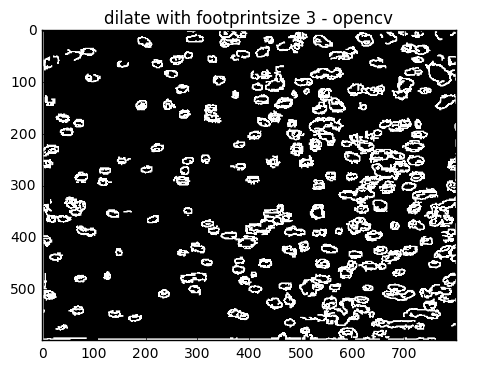

In [157]:
bubbler = BubbleKicker('0325097m_0305.tif', channel='red')
bubbler.edge_detect_canny_opencv([30, 80]) # canny edge detection givin the two parameters to build the gaussian
bubbler.dilate_opencv(3) # dilate using opencv function
bubbler.plot();
bubbler.what_have_i_done()

#### we can see that too many edges are detected, we need to refine, let's now try with [90, 120]¶

Steps undertaken since from raw image:
edge-detect with thresholds 90 -> 120 - opencv
dilate with footprintsize 3 - opencv
clear border with buffer size 3 and bgval 1 -  skimage




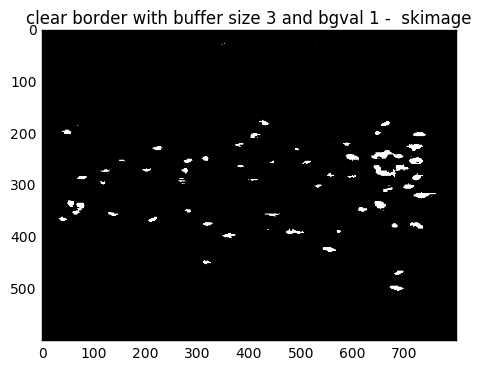

In [158]:
bubbler.reset_to_raw()
bubbler.edge_detect_canny_opencv([90, 120])
bubbler.dilate_opencv(3)
bubbler.clear_border_skimage(3, 1)
bubbler.plot();
bubbler.what_have_i_done()

#### a not adaptive method can be limiting with a uneven background, let's now try the adaptive detection in custom mode¶

Steps undertaken since from raw image:
adaptive threshold bubble detection with blocksize 91 and cvalue 18 - opencv
clear border with buffer size 3 and bgval 1 -  skimage




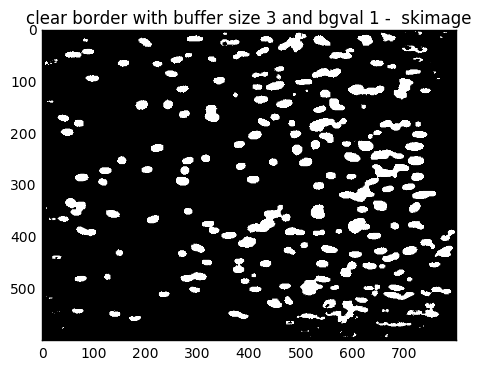

In [159]:
bubbler.reset_to_raw() # here we are running things in default mode
bubbler.adaptive_threshold_opencv()
bubbler.clear_border_skimage()
bubbler.plot()
bubbler.what_have_i_done()

### Now we might be ready to go for a batch of images

In [160]:
res = batchbubblekicker('sample_images', 'red',
                        AdaptiveThresholdPipeline,
                        91, 18, 3, 1, 1)

### Bubble properties

#### bubble properties can be returned as a table¶

20


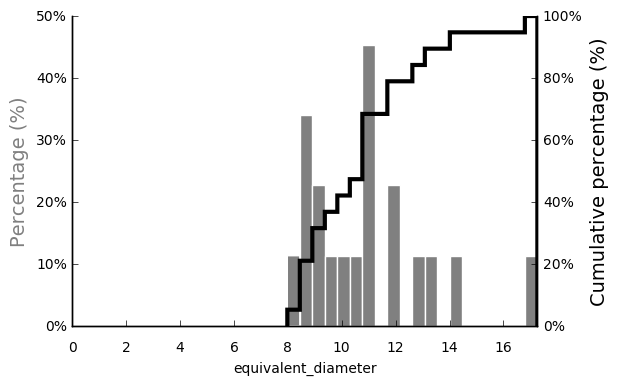

In [161]:
bubbler = CannyPipeline('0325097m_0305.tif', channel='red')
result = bubbler.run([120, 180], 3, 3, 1, 1)
nbubbles, marker_image, props = bubble_properties_calculate(result)
print nbubbles
fig, axs = bubble_properties_plot(props, "equivalent_diameter")

##### ...for the ease of object selection and futher filtering, based on default parameters

{'min': 0.92}
{'max': 1.6, 'min': 0.2}
       area                        centroid  convex_area  equivalent_diameter  \
label                                                                           
1        59  (200.101694915, 646.406779661)           62             8.667245   
2       156  (202.724358974, 726.679487179)          164            14.093451   
3       133  (205.037593985, 409.571428571)          144            13.013103   
4        62  (221.161290323, 586.709677419)           73             8.884866   
5        74   (222.72972973, 380.216216216)           83             9.706685   
6        99  (229.535353535, 222.565656566)          111            11.227231   
7       234  (247.256410256, 597.914529915)          249            17.260882   
8        86  (249.372093023, 314.546511628)           91            10.464158   
9        98  (253.714285714, 281.204081633)          111            11.170384   
10       50                (263.66, 382.96)           55             7

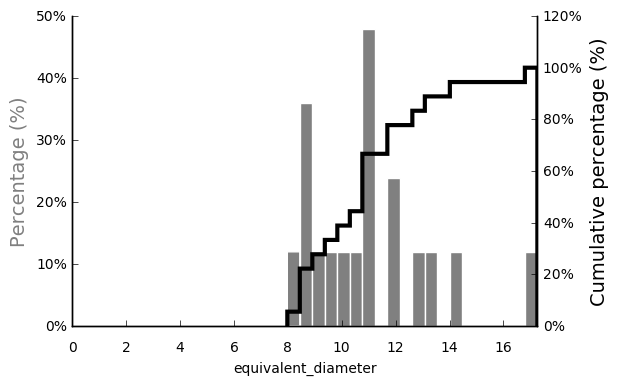

In [162]:
filtered_bubbles = bubble_properties_filter(props)
print(filtered_bubbles)
fig, axs = bubble_properties_plot(filtered_bubbles, "equivalent_diameter")

##### filter based on custom parameters

{'min': 1.92}
{'max': 1.6, 'min': 0.3}
       area                        centroid  convex_area  equivalent_diameter  \
label                                                                           
1        59  (200.101694915, 646.406779661)           62             8.667245   
2       156  (202.724358974, 726.679487179)          164            14.093451   
3       133  (205.037593985, 409.571428571)          144            13.013103   
4        62  (221.161290323, 586.709677419)           73             8.884866   
5        74   (222.72972973, 380.216216216)           83             9.706685   
6        99  (229.535353535, 222.565656566)          111            11.227231   
7       234  (247.256410256, 597.914529915)          249            17.260882   
8        86  (249.372093023, 314.546511628)           91            10.464158   
9        98  (253.714285714, 281.204081633)          111            11.170384   
11       91  (272.692307692, 275.076923077)          100            10

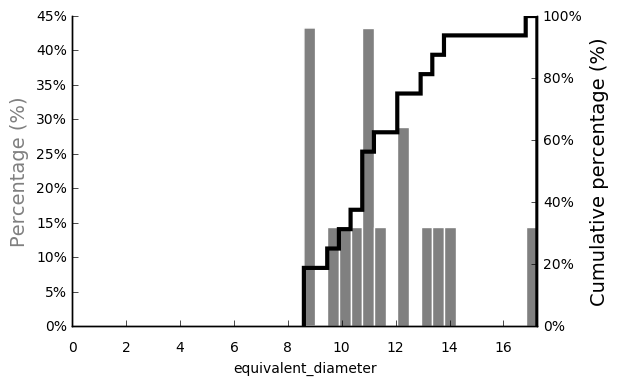

In [163]:
custom_filter = {'circularity_reciprocal': {'min': 0.3, 'max': 1.6},
                 'convexity': {'min': 1.92}}

filtered_bubbles = bubble_properties_filter(props, custom_filter)
print(filtered_bubbles)
plt.show()
fig, axs = bubble_properties_plot(filtered_bubbles, "equivalent_diameter")